# **Does the Marketshare of Nvidia hardware relate to the stock price of the Nvidia Corporation?**

By Izaan Syed, 100922342

---
**Introduction:**
-

In recent times, Nvidia stock prices have been in the news for skyrocketing massively, being up ~2500% in the last five years. Nvidia is widely recognized by consumers as a gaming-focused company produce of graphics processing units (GPUs), which facilitate video game rendering on desktops and notebooks with their Geforce Graphics product line. Nvidia is also a major player in the industrial sector, being involved in high-performance computing, autonomous vehicles, data centers, and, most notably, artificial intelligence. Nvidia-developed hardware powers both the [Las Vegas Sphere](https://blogs.nvidia.com/blog/sphere-las-vegas/) and most notably the large language AI model known as [ChatGPT.](https://developer.nvidia.com/blog/new-video-what-runs-chatgpt/)



As Nvidia's stock price has skyrocketed massively, and Nvidia's most consumer-direct business sector is selling discrete graphics cards, I though it would be interesting to analyze if Nvidia's consumer GPU marketshare can be linked to Nvidia Corporation's stock prices increasing in value.

The time period observed will be November 2019, to September 2024. This time period includes many new releases of hardware, including Nvidia's 20 series launch, 16 series launch, 30 series launch, 40 series launch, and rival AMDs' launches of the 5XXX series, 6XXX series, and 7XXX series. The selected time period also includes notable events such as the cryptocurrency boom of 2021 and the release of OpenAI's ChatGPT in 2022.

The stock market data data was collected from [Marketwatch](https://www.marketwatch.com/investing/stock/nvda), and the GPU marketshare data was collected by [Valve's Steam hardware survery](https://github.com/jdegene/steamHWsurvey)

Unfortunately, the Steam hardware survey does not report total participants, rather only percentages. This means that the comparison will have to be made between marketshare dominance (compared to Intel and AMD) and stock prices, rather than just GPU units compared to stock price.



---

Import Statements;

In [81]:
import pandas as pd # Libary used to organize date into 'dataframes', allowing for easier manipulation and presentation
import matplotlib.pyplot as plt # Library used to generate graphic plots to visually represent data
import numpy as np # Library focused on arithmetics, used to generate line of best fit, 

---
Cleaning of SHS survery for data on Nvidia Marketshare;

(Due to a website limitation, all data was not available in a single CSV file - instead the data is split into 5 files which will be combined in the cleaning process.)

In [82]:
shs = pd.read_csv('shs.csv')

# Delete rows previous to the index of the row of 2019-11-01 (starting index)
idx = shs[shs['date'] == '2019-11-01'].index[0]
shs = shs.loc[idx:]

# Include only columns that have 'Video Card Description' in the category row
shs = shs[shs['category'].str.contains('Video Card Description')]

# Include only columns that have 'NVIDIA' in the description row
shs = shs[shs['name'].str.contains('NVIDIA', na=False, case=False)]

# Delete october 2024 as it is outside of analysis range
shs = shs[shs['date'] != '2024-10-01']

# Calculate the total NVIDIA market share for each month
# Convert the 'date' column to datetime for grouping
shs['date'] = pd.to_datetime(shs['date'])

# Group by year and month, and sum up the percentages. Line generated by copilot
nvidia_marketshare = shs.groupby(shs['date'].dt.to_period('M'))['percentage'].sum().reset_index()

# Convert period to a string representation for easier handling
nvidia_marketshare['date'] = nvidia_marketshare['date'].astype(str)

# add day to YYYY-MM (new format YYYY-MM-DD)
nvidia_marketshare['date'] = nvidia_marketshare['date'] + '-01'

# Change 'date' to 'Date' and 'percentage' to 'Marketshare Percentage', to clean up presentation
nvidia_marketshare.columns = ['Date', 'Marketshare Percentage']

# Multiply stock value by 100 to convert decimal marketshare value to percentage
nvidia_marketshare['Marketshare Percentage'] = nvidia_marketshare['Marketshare Percentage'] * 100

# Print the resulting marketshare DataFrame
print(nvidia_marketshare)


          Date  Marketshare Percentage
0   2019-11-01                   69.19
1   2019-12-01                   69.35
2   2020-01-01                   69.21
3   2020-02-01                   68.61
4   2020-03-01                   68.04
5   2020-04-01                   66.80
6   2020-05-01                   66.21
7   2020-06-01                   67.44
8   2020-07-01                   67.85
9   2020-08-01                   67.86
10  2020-09-01                   67.76
11  2020-10-01                   67.66
12  2020-11-01                   68.22
13  2020-12-01                   72.19
14  2021-01-01                   68.56
15  2021-02-01                   69.14
16  2021-03-01                   69.61
17  2021-04-01                   70.09
18  2021-05-01                   69.65
19  2021-06-01                   70.60
20  2021-07-01                   69.16
21  2021-08-01                   71.42
22  2021-09-01                   70.33
23  2021-10-01                   69.52
24  2021-11-01           

---
Cleaning of Nvidia Stock market data

In [83]:
# Combine NVDA1, NVDA2, NVDA3, NVDA4, NVDA5 csv files into a single dataframe
nvda1 = pd.read_csv('NVDA1.csv')
nvda2 = pd.read_csv('NVDA2.csv')
nvda3 = pd.read_csv('NVDA3.csv')
nvda4 = pd.read_csv('NVDA4.csv')
nvda5 = pd.read_csv('NVDA5.csv')
nvda = pd.concat([nvda1, nvda2, nvda3, nvda4, nvda5])

# Remove high, low, close, volume rows. Only open is relevant because it matches the most closely to the SHS measurement dates
nvda = nvda[['Date', 'Open']]

# Rename 'Open' to 'Stock Price', as we will use market open price as the definitive stock price.
nvda = nvda.rename(columns={'Open': 'Stock Price'})

# Add /01 to date (MM/YYYY to MM/DD/YYYY)
nvda['Date'] = nvda['Date'].apply(lambda x: f"{x.split('/')[0]}/01/{x.split('/')[1]}") # Line generated by ChatGPT

# Move year first (MM/DD/YYYY to YYYY/MM/DD)
nvda['Date'] = pd.to_datetime(nvda['Date'])

# Sort in ascending order
nvda = nvda.sort_values(by='Date')

print(nvda)


         Date  Stock Price
12 2019-11-01         5.24
11 2019-12-01         5.41
10 2020-01-01         5.97
9  2020-02-01         5.89
8  2020-03-01         6.92
7  2020-04-01         6.39
6  2020-05-01         7.11
5  2020-06-01         8.83
4  2020-07-01         9.52
3  2020-08-01        10.73
2  2020-09-01        13.48
1  2020-10-01        13.76
0  2020-11-01        12.66
11 2020-12-01        13.49
10 2021-01-01        13.10
9  2021-02-01        13.05
8  2021-03-01        13.88
7  2021-04-01        13.57
6  2021-05-01        15.13
5  2021-06-01        16.27
4  2021-07-01        20.13
3  2021-08-01        19.70
2  2021-09-01        22.49
1  2021-10-01        20.75
0  2021-11-01        25.65
11 2021-12-01        33.22
10 2022-01-01        29.82
9  2022-02-01        25.10
8  2022-03-01        24.29
7  2022-04-01        27.38
6  2022-05-01        18.54
5  2022-06-01        18.72
4  2022-07-01        14.90
3  2022-08-01        18.18
2  2022-09-01        14.21
1  2022-10-01        12.35
0

---
Combining both Dataframes for stock price and marketshare into a single Dataframe for graph creation.

In [84]:
# Ensure consistency in date
nvda['Date'] = pd.to_datetime(nvda['Date']) 
nvidia_marketshare['Date'] = pd.to_datetime(nvidia_marketshare['Date']) 

# Merge the two DataFrames on the 'Date' column
nvidia_analysis = pd.merge(nvda, nvidia_marketshare, on='Date', how='outer')

# Sort by date after merging to maintain chronological order
nvidia_analysis = nvidia_analysis.sort_values(by='Date')

# Print the resulting combined DataFrame
print(nvidia_analysis)


         Date  Stock Price  Marketshare Percentage
0  2019-11-01         5.24                   69.19
1  2019-12-01         5.41                   69.35
2  2020-01-01         5.97                   69.21
3  2020-02-01         5.89                   68.61
4  2020-03-01         6.92                   68.04
5  2020-04-01         6.39                   66.80
6  2020-05-01         7.11                   66.21
7  2020-06-01         8.83                   67.44
8  2020-07-01         9.52                   67.85
9  2020-08-01        10.73                   67.86
10 2020-09-01        13.48                   67.76
11 2020-10-01        13.76                   67.66
12 2020-11-01        12.66                   68.22
13 2020-12-01        13.49                   72.19
14 2021-01-01        13.10                   68.56
15 2021-02-01        13.05                   69.14
16 2021-03-01        13.88                   69.61
17 2021-04-01        13.57                   70.09
18 2021-05-01        15.13     

---
Graph plotting NVDA stock prices

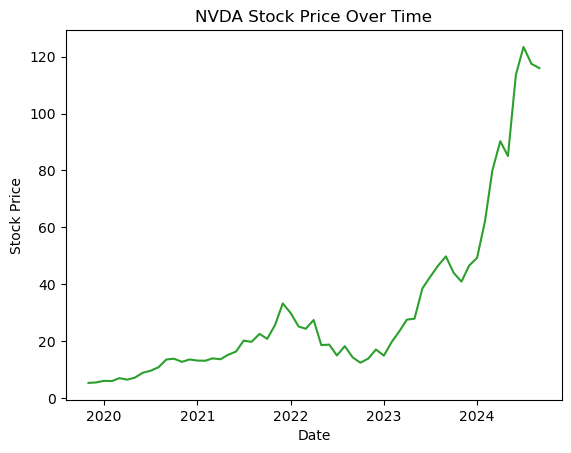

In [85]:
plt.plot(nvidia_analysis['Date'], nvidia_analysis['Stock Price'], label='NVDA Stock Price', color='tab:green') # Creates the plot
plt.xlabel('Date')  # Labels X axis
plt.ylabel('Stock Price') # Labels Y axis
plt.title('NVDA Stock Price Over Time')  # Labels graph

#Line of best fit was omitted due to clear trend of data

plt.show() # Displays graph

---
Graph plotting marketshare of Nvidia hardware

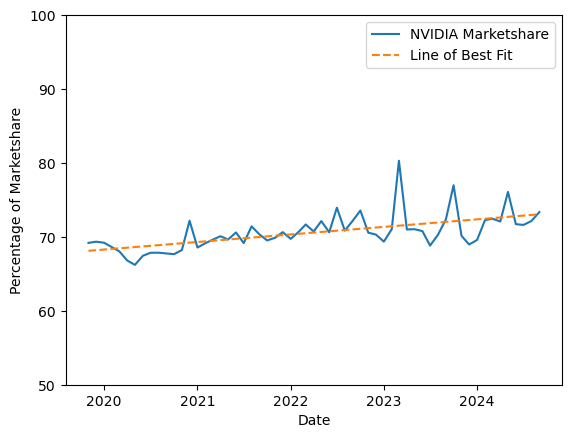

In [86]:
# Convert 'Date' to numerical values for regression
nvidia_analysis['Date_numeric'] = nvidia_analysis['Date'].map(lambda x: x.toordinal())

# Perform linear regression to get slope and intercept 
slope, intercept = np.polyfit(
    nvidia_analysis['Date_numeric'],
    nvidia_analysis['Marketshare Percentage'],
    1
)

# Generate line of best fit
line_of_best_fit = slope * nvidia_analysis['Date_numeric'] + intercept

# Plot the data
plt.plot(nvidia_analysis['Date'], nvidia_analysis['Marketshare Percentage'], label='NVIDIA Marketshare', color='tab:blue')
plt.plot(nvidia_analysis['Date'], line_of_best_fit, label='Line of Best Fit', color='tab:orange', linestyle='--') # Adds line of best fit
plt.xlabel('Date') # Labels X axis
plt.ylabel('Percentage of Marketshare') # Labels y axis
plt.ylim(50, 100) # Sets scale from 50-100 for marketshare percentage
plt.legend() # Adds a legend to the plot

plt.show() # Displays graph


---

Combined graph of marketshare and stock price;

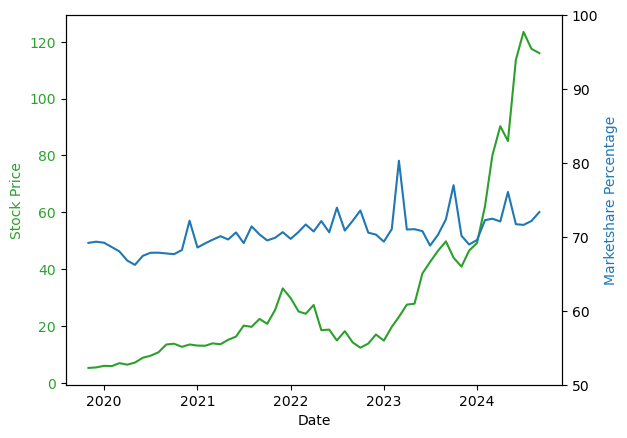

In [87]:
fig, ax1 = plt.subplots() # Create the initial plot with the first y-axis

# Add stock prices
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(nvidia_analysis['Date'], nvidia_analysis['Stock Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Add marketshare percentage to the initial plot
ax1 = ax1.twinx()
color = 'tab:blue'
ax1.set_ylabel('Marketshare Percentage', color=color)
ax1.set_ylim(50, 100)
ax1.plot(nvidia_analysis['Date'], nvidia_analysis['Marketshare Percentage'], color=color)

# Line of best fit omitted to prevent confusion

---
**Discussion:**
-

Overall, the marketshare for Nvidia GPU's based on the steam hardware survey appears to be mostly consistent, staying between 65% and 80% for 4 years. This is expected as AMD, their main competitor for consumer GPU's, has remained at the same level of competitiveness in the market within the timespan graphed. There has been a plethora of hardware releaess by both companies in this timeframe.

The stock prices for Nvidia however have skyrocketed in recent times. There was a small bump near 2022, attributed to the cryptocurrency mining boom of 2022. There was a huge skyrocket in 2024, occuring in the same timeframe as the deep learning AI boom, which is largely powered by Nvidia's CUDA technology and datacenter hardware. 

When plotting Nvidia Stock price against their consumer marketshare, it is shown that there is little correlation between stock price and their marketshare, despite their stock pricing shooting high disproportionately compared to their competitors in the market. The bumps in the stock prices in 2022 and 2024 and not reflected as an increase in consumer marketshare. 

This lack of correlation  suggests that Nvidia's growth and valuation are driven primarily by its dominance in industrial sectors, including high-performance computing, autonomous vehicles, data centers, and, most notably, artificial intelligence. 

In conclusion, while Nvidia's largest visible presence may be in consumer GPUs, its most significant and recent financial success can instead be attributed to their commercial and industrial applications.


---
**References:**
-

https://www.marketwatch.com/investing/stock/nvda

https://github.com/jdegene/steamHWsurvey